In [ ]:
df = pd.read_csv('healthcare_dataset.csv')
df.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [3]:
df.info()
df.describe()
df.describe(include = object) # it gives the complete information about the categorical coln
# there is no null values or missing values in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

,Name,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Admission Type,Discharge Date,Medication,Test Results
count,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500,55500
unique,49992,2,8,6,1827,40341,39876,5,3,1856,5,3
top,DAvId muNoZ,Male,A-,Arthritis,2024-03-16,Michael Smith,LLC Smith,Cigna,Elective,2020-03-15,Lipitor,Abnormal
freq,3,27774,6969,9308,50,27,44,11249,18655,53,11140,18627


In [4]:
df['Blood Type'].value_counts()
df['Medical Condition'].value_counts()
df['Test Results'].value_counts()

Test Results
Abnormal        18627
Normal          18517
Inconclusive    18356
Name: count, dtype: int64

In [5]:
df = df[df['Billing Amount'] > 0]

In [6]:
df.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [7]:
df['Admit_Period'] = (pd.to_datetime(df['Discharge Date']) - pd.to_datetime(df['Date of Admission'])).dt.days
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results,Admit_Period
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal,2
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive,6
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal,15
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal,30
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal,20


In [8]:
df.describe()

,Age,Billing Amount,Room Number,Admit_Period
count,55392.000000,55392.000000,55392.000000,55392.000000
mean,51.538543,25590.084632,301.119205,15.508774
std,19.602045,14178.657522,115.238552,8.659552
min,13.000000,9.238787,101.000000,1.000000
25%,35.000000,13297.478682,202.000000,8.000000
50%,52.000000,25573.823359,302.000000,15.000000
75%,68.000000,37849.210062,401.000000,23.000000
max,89.000000,52764.276736,500.000000,30.000000


In [9]:

df = df.loc[:, ['Age', 'Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
               'Billing Amount', 'Admission Type', 'Medication', 'Admit_Period','Test Results']]
df.head(1)

,Age,Gender,Blood Type,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication,Admit_Period,Test Results
0,30,Male,B-,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol,2,Normal


<Axes: >

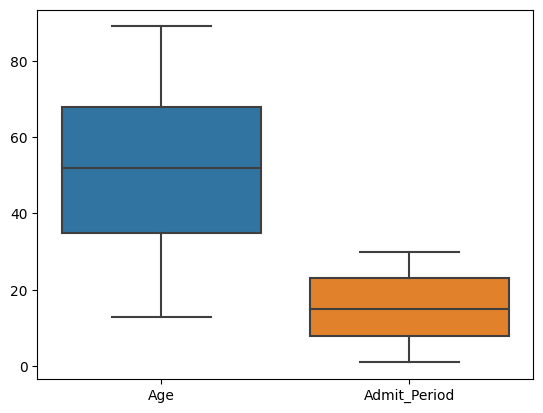

In [10]:
import seaborn as sns
sns.boxplot(df[['Age', 'Admit_Period']])
# there are no outliers 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Label Encoding 
converting categorical to  numerical data 

In [12]:
le = LabelEncoder()
df = pd.get_dummies(df, columns=['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
                                 'Admission Type', 'Medication'], drop_first=True)
df['Test Results'] = le.fit_transform(df['Test Results']) 
df.head(4)


,Age,Billing Amount,Admit_Period,Test Results,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,18856.281306,2,2,True,False,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False
1,62,33643.327287,6,1,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
2,76,27955.096079,15,2,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,28,37909.782410,30,0,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


# Split data 
splitting data in to x and y

In [13]:
y = df.pop('Test Results')
x = df

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 1)

# Model Bulding

In [15]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

# fit the model 
model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=1)

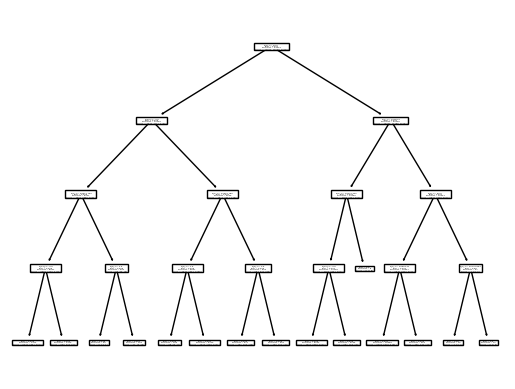

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plot_tree(model)
plt.show()

In [17]:
ypred = model.predict(xtest)
print('Accuracy ', accuracy_score(ytest, ypred))

Accuracy  0.3371242891957758


In [18]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3,4,5,6,7]
    
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7]},
             scoring='accuracy')

In [19]:
ypred1 = grid_search.predict(xtest)

In [20]:
print('Accuracy ', accuracy_score(ytest, ypred1))

Accuracy  0.33405542016427475


# Feature Engineering
finding the best features for model bilding 

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [22]:
# feature selection
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = np.log(x+1)
X = scaler.fit_transform(X)
test = SelectKBest(score_func = chi2, k=26)
fit = test.fit(x,y)
np.set_printoptions(precision = 4)
print(fit.scores_)


[2.6723e+01 1.2255e+04 3.7898e+00 1.0542e+00 3.5051e-02 5.3398e-01
 1.7180e+00 3.2645e+00 4.6733e-01 4.6079e-01 2.9770e-01 4.1986e+00
 4.9018e-01 1.0900e+00 4.0890e+00 6.3019e-01 2.8039e+00 5.7675e-01
 8.8346e-01 3.1625e+00 3.7066e-01 2.6358e-01 3.5684e-01 1.4917e+00
 5.8057e-01 6.0609e-02]


In [23]:
acc =pd.DataFrame(fit.scores_)
acc['columns'] = x.columns
acc

,0,columns
0,26.723369,Age
1,12254.827051,Billing Amount
2,3.789844,Admit_Period
3,1.054202,Gender_Male
4,0.035051,Blood Type_A-
5,0.533982,Blood Type_AB+
6,1.717967,Blood Type_AB-
7,3.264539,Blood Type_B+
8,0.467329,Blood Type_B-
9,0.460794,Blood Type_O+


In [24]:
data = x[['Age', 'Billing Amount']]
data

,Age,Billing Amount
0,30,18856.281306
1,62,33643.327287
2,76,27955.096079
3,28,37909.782410
4,43,14238.317814
...,...,...
55495,42,2650.714952
55496,61,31457.797307
55497,38,27620.764717
55498,43,32451.092358


In [25]:
dtrain, dtest, ytrain, ytest = train_test_split(data,y,test_size = 0.2, random_state = 1)
model.fit(dtrain, ytrain)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [26]:
dpred = model.predict(dtest)

In [27]:
print('Accuracy ', accuracy_score(dpred, ytest))

Accuracy  0.3327917682101273
